In [18]:
import numpy as np
import scipy
import matplotlib.pylab as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
#import torch
import math
import copy
import random
import os
#import cvxpy as cp
from random import randrange
#from matplotlib.backends.backend_pdf import PdfPages

In [6]:
dim = 5
H = 20
T = 1000
repeat =20
ACTION = np.power(2,dim-1)
STATE = H+2

thetastar = np.append(0.01*np.ones(dim-1), 1)
delta = 0.05

# dim = 5 0.9
# H = 5
# T = 100000
# ACTION = np.power(2,dim-1)
# STATE = H+2

# thetastar = np.append(0.1*np.ones(dim-1), 1)
# delta = 0.3

In [7]:
def trans_action(a, d):###d is dimension, dimension of a is d-1
    tt = np.zeros(d-1)-1
    bb = bin(a)
    for i in range(len(bb)-2):
        tt[i] = 2*np.double(bb[i+2])-1
    return(tt)


def phi(s,a,sp):
    tt = np.zeros(dim)
    d = dim
    aa = trans_action(a,d)
    if s<H:
        if sp == s+1:            
            for i in range(d-1):
                tt[i] = -aa[i]
            tt[d-1] = 1-delta
    if s<H:
        if sp == H+1:            
            for i in range(d-1):
                tt[i] = aa[i]
            tt[d-1] = delta
    if s==H:
        if sp == H:            
            for i in range(d-1):
                tt[i] = 0
            tt[d-1] = 1
    if s==H+1:
        if sp == H+1:            
            for i in range(d-1):
                tt[i] = 0
            tt[d-1] = 1
    return tt


def phiv(s,a,v):
    if s==H+1:
        return phi(s,a,H+1)*v[H+1]
    return (phi(s,a,H+1)*v[H+1] + phi(s,a,s+1)*v[s+1])

def proba(s,a,sp):
    return np.dot(phi(s,a,sp), thetastar)

def reward(s,a):
    if s== H+1:
        return 1
    return 0

def advreward(s,a):
    return 1-reward(s,a)




In [4]:
for jjjj in range(repeat):
    ############tabular###################
    s_cur = 0
    REWARD = 0
    TOTALREWARD = []
    for t in range(T):
        s_cur = 0
        for stage in range(H):
            a_cur = np.int(np.power(2, dim-1))-1
            s_next = s_cur
            #a_cur = randrange(ACTION)
            if s_cur< H:
                s_next = H+1-np.random.binomial(1, proba(s_cur, a_cur , s_cur+1))*(H-s_cur)
            #print( proba(s_cur, a_cur , s_cur+1))
            REWARD += reward(s_cur, a_cur)
            TOTALREWARD.append(REWARD)
            s_cur = s_next
            #print([t, REWARD, s_cur, a_cur, ])
    #     print(REWARD)
    path  = "optimal_lowerbound_0.1_" + str(jjjj) +".txt"
    fr = open(path,'w')
    for i in TOTALREWARD:
        fr.write(str(i))
        fr.write("\n")
    fr.close() 

C:\Users\11537\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [5]:
for jjjj in range(repeat):
    ############tabular###################
    s_cur = 0
    REWARD = 0
    TOTALREWARD = []
    for t in range(T):
        s_cur = 0
        for stage in range(H):
            #a_cur = randrange(ACTION)
            s_next = s_cur
            a_cur = randrange(ACTION)
            if s_cur< H:
                s_next = H+1-np.random.binomial(1, proba(s_cur, a_cur , s_cur+1))*(H-s_cur)
            #print( proba(s_cur, a_cur , s_cur+1))
            REWARD += reward(s_cur, a_cur)
            TOTALREWARD.append(REWARD)
            s_cur = s_next
            #print([t, REWARD, s_cur, a_cur, ])
    #     print(REWARD)
    path  = "random_lowerbound_0.1_" + str(jjjj) +".txt"
    fr = open(path,'w')
    for i in TOTALREWARD:
        fr.write(str(i))
        fr.write("\n")
    fr.close() 

In [6]:
for jjjj in range(repeat):
    ############tabular###################
    print(jjjj)
    s_cur = np.zeros(H+1).astype(int)
    a_cur = np.zeros(H).astype(int)
    QVALUE = np.zeros((STATE, ACTION, H+1))
    VVALUE = np.zeros((STATE, H+1))
    LAMBDA = 1
    beta=2.75
    SIGMA = np.zeros((dim, dim, H))
    for stage in range(H):
        SIGMA[:,:,stage] = LAMBDA*np.diag(np.ones(dim))
    BB = np.zeros((dim, H))
    POLICY = np.ones((STATE, ACTION, H+1))/ACTION
    REWARD = 0
    TOTALREWARD = []
    for t in range(T):
        s_cur[0] = 0
        for stage in range(H):
            #a_cur = randrange(ACTION)
            a_cur[stage] = np.random.choice(ACTION, 1, p=POLICY[s_cur[stage],:,stage])
            #a_cur[stage] = randrange(ACTION)
            s_next = s_cur[stage]
            if s_cur[stage]< H:
                s_next = H+1-np.random.binomial(1, proba(s_cur[stage], a_cur[stage] , s_cur[stage]+1))*(H-s_cur[stage])
            #print( proba(s_cur, a_cur , s_cur+1))
            REWARD += reward(s_cur[stage], a_cur[stage])
            TOTALREWARD.append(REWARD)
            s_cur[stage+1] = s_next
            #print([t, stage, REWARD, s_cur[stage], a_cur[stage]])
        for stage in range(H):
            curstage=H-1-stage
            phi_v = phiv(s_cur[curstage], a_cur[curstage], VVALUE[:,curstage+1])
            BB [:,curstage] = BB [:,curstage] + phi_v*VVALUE[s_cur[curstage+1], curstage+1]
            #BB [:,curstage] = BB [:,curstage] + phi_v*VVALUE[H+1, curstage+1]*
            phi_v.shape = (dim,1)
            SIGMA[:,:,curstage]  = SIGMA[:,:,curstage] + np.dot(phi_v, phi_v.T)
            hattheta = np.linalg.lstsq(SIGMA[:,:,curstage], BB[:,curstage], rcond=-1)
            hattheta = hattheta[0]
            hattheta.shape = (dim)
            for stat in range(STATE):
                for act in range(ACTION):
                    UU=np.linalg.lstsq(SIGMA[:,:,curstage], phiv(stat,act, VVALUE[:,curstage+1]), rcond=-1)
                    UU= UU[0]
                    UU.shape = (dim)
                    QVALUE[stat,act,curstage] =reward(stat,act)+  np.dot(hattheta,phiv(stat,act, VVALUE[:,curstage+1]))+ beta * np.sqrt(np.dot(UU, phiv(stat,act, VVALUE[:,curstage+1])))
                    QVALUE[stat,act,curstage] = min(QVALUE[stat,act,curstage],stage+1) 
                    QVALUE[stat,act,curstage] = max (QVALUE[stat,act,curstage],0)
                VVALUE [stat, curstage]= np.dot(QVALUE [stat,:,curstage],  POLICY[stat,:,curstage].T)
                sum =0
                for act in range(ACTION):
                    POLICY[stat,act,curstage] = POLICY[stat,act,curstage] * np.exp (QVALUE[stat,act,curstage])
                    sum = sum + POLICY[stat,act,curstage]
                for act in range(ACTION):
                    POLICY[stat,act,curstage] = POLICY[stat,act,curstage]/sum    

    path  = "OPPO_lowerbound_0.1_" + str(jjjj) +".txt"
    fr = open(path,'w')
    for i in TOTALREWARD:
        fr.write(str(i))
        fr.write("\n")
    fr.close() 
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [7]:
for jjjj in range(repeat):
    ############tabular###################
    print(jjjj)
    s_cur = np.zeros(H+1).astype(int)
    a_cur = np.zeros(H).astype(int)
    QVALUE = np.zeros((STATE, ACTION, H+1))
    VVALUE = np.zeros((STATE, H+1))
    LAMBDA = 1
    beta=0.35
    beta1=0.45
    SIGMA = np.zeros((dim, dim, H))
    SIGMA1 = np.zeros((dim, dim, H))
    SIGMA2 = np.zeros((dim, dim, H))
    for stage in range(H):
        SIGMA[:,:,stage] = LAMBDA*np.diag(np.ones(dim))
        SIGMA1[:,:,stage] = LAMBDA*np.diag(np.ones(dim))
        SIGMA2[:,:,stage] = LAMBDA*np.diag(np.ones(dim))
    BB = np.zeros((dim, H))
    BB1 = np.zeros((dim, H))
    BB2 = np.zeros((dim, H))
    POLICY = np.ones((STATE, ACTION, H+1))/ACTION
    REWARD = 0
    TOTALREWARD = []
    for t in range(T):
        s_cur[0] = 0
        for stage in range(H):
            #a_cur = randrange(ACTION)
            a_cur[stage] = np.random.choice(ACTION, 1, p=POLICY[s_cur[stage],:,stage])
            #a_cur[stage] = randrange(ACTION)
            s_next = s_cur[stage]
            if s_cur[stage]< H:
                s_next = H+1-np.random.binomial(1, proba(s_cur[stage], a_cur[stage] , s_cur[stage]+1))*(H-s_cur[stage])
            #print( proba(s_cur, a_cur , s_cur+1))
            REWARD += reward(s_cur[stage], a_cur[stage])
            TOTALREWARD.append(REWARD)
            s_cur[stage+1] = s_next
            #print([t, stage, REWARD, s_cur[stage], a_cur[stage]])
        for stage in range(H):
            curstage=H-1-stage
            
            phi1_v = phiv(s_cur[curstage], a_cur[curstage], VVALUE[:,curstage+1])
            phi2_v = phiv(s_cur[curstage], a_cur[curstage], VVALUE[:,curstage+1]*VVALUE[:,curstage+1])
            BB1 [:,curstage] = BB1 [:,curstage] + phi1_v*VVALUE[s_cur[curstage+1], curstage+1]
            BB2 [:,curstage] = BB2 [:,curstage] + phi2_v*VVALUE[s_cur[curstage+1], curstage+1]*VVALUE[s_cur[curstage+1], curstage+1]
            phi1_v.shape = (dim,1)
            SIGMA1[:,:,curstage]  = SIGMA1[:,:,curstage] + np.dot(phi1_v, phi1_v.T)
            phi2_v.shape = (dim,1)
            SIGMA2[:,:,curstage]  = SIGMA2[:,:,curstage] + np.dot(phi2_v, phi2_v.T)
            
            hattheta1 = np.linalg.lstsq(SIGMA1[:,:,curstage], BB1[:,curstage], rcond=-1)
            hattheta1 = hattheta1[0]
            hattheta1.shape = (dim)
            
            hattheta2 = np.linalg.lstsq(SIGMA2[:,:,curstage], BB2[:,curstage], rcond=-1)
            hattheta2 = hattheta2[0]
            hattheta2.shape = (dim)
            
            UU1=np.linalg.lstsq(SIGMA1[:,:,curstage], phi1_v, rcond=-1)
            UU1= UU1[0]
            UU1.shape = (dim)
            
            UU2=np.linalg.lstsq(SIGMA2[:,:,curstage], phi2_v, rcond=-1)
            UU2= UU2[0]
            UU2.shape = (dim)
            
            variance = min(max(np.dot(hattheta2,phi2_v),0),H ** 2) - min(max(np.dot(hattheta1,phi1_v),0),H) ** 2+ beta1 * np.sqrt(np.dot(UU1, phi1_v)) + beta1 * np.sqrt(np.dot(UU2, phi2_v))
            variance = np.sqrt(max(variance,H*H/dim))
            
            phi_v = phiv(s_cur[curstage], a_cur[curstage], VVALUE[:,curstage+1])
            BB [:,curstage] = BB [:,curstage] + phi_v*VVALUE[s_cur[curstage+1], curstage+1]/variance/variance
            phi_v.shape = (dim,1)
            SIGMA[:,:,curstage]  = SIGMA[:,:,curstage] + np.dot(phi_v, phi_v.T)/variance/variance
            hattheta = np.linalg.lstsq(SIGMA[:,:,curstage], BB[:,curstage], rcond=-1)
            hattheta = hattheta[0]
            hattheta.shape = (dim)
            for stat in range(STATE):
                for act in range(ACTION):
                    UU=np.linalg.lstsq(SIGMA[:,:,curstage], phiv(stat,act, VVALUE[:,curstage+1]), rcond=-1)
                    UU= UU[0]
                    UU.shape = (dim)
                    QVALUE[stat,act,curstage] =reward(stat,act)+  np.dot(hattheta,phiv(stat,act, VVALUE[:,curstage+1]))+ beta * np.sqrt(np.dot(UU, phiv(stat,act, VVALUE[:,curstage+1])))
                    QVALUE[stat,act,curstage] = min(QVALUE[stat,act,curstage],stage+1) 
                    QVALUE[stat,act,curstage] = max (QVALUE[stat,act,curstage],0)
                VVALUE [stat, curstage]= np.dot(QVALUE [stat,:,curstage],  POLICY[stat,:,curstage].T)
                sum =0
                for act in range(ACTION):
                    POLICY[stat,act,curstage] = POLICY[stat,act,curstage] * np.exp (QVALUE[stat,act,curstage])
                    sum = sum + POLICY[stat,act,curstage]
                for act in range(ACTION):
                    POLICY[stat,act,curstage] = POLICY[stat,act,curstage]/sum    


    path  = "OPPObern_lowerbound_0.1_" + str(jjjj) +".txt"
    fr = open(path,'w')
    for i in TOTALREWARD:
        fr.write(str(i))
        fr.write("\n")
    fr.close() 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


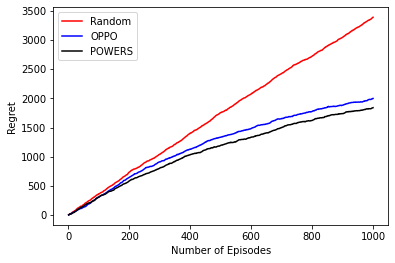

<Figure size 432x288 with 0 Axes>

In [19]:
T1=H*T
rewardopt = np.zeros(T1+1)
rewardran = np.zeros(T1+1)
rewardOPPO = np.zeros(T1+1)
rewardOPPObern = np.zeros(T1+1)
rewardliu = np.zeros(T1+1)
rewardcur = 0

for jjjj in range(repeat):
    line1=0
    path  = "optimal_lowerbound_0.1_" + str(jjjj) +".txt"
    fr = open(path,'r')
    for line in fr:
        rewardopt[line1]=rewardopt[line1]+int(line)
        line1+=1
    fr.close() 
for i in range(T1):
    rewardopt[i] = (rewardopt[i])/repeat
#x=list(range(1, T1))
# plt.plot(x, rewardopt[0:T1-1],color='orange', label='Optimal')
    
    
for jjjj in range(repeat):
    line1=0
    path  = "random_lowerbound_0.1_" + str(jjjj) +".txt"
    fr = open(path,'r')
    for line in fr:
        rewardran[line1]=rewardran[line1]+int(line)
        line1+=1
    fr.close() 
for i in range(T1):
    rewardran[i] = rewardopt[i]-(rewardran[i])/repeat
x=list(range(1, T+1))
plt.plot(x, rewardran[0:T1-1:H],color='red', label='Random')



for jjjj in range(repeat):
    line1=0
    path  = "OPPO_lowerbound_0.1_" + str(jjjj) +".txt"
    fr = open(path,'r')
    for line in fr:
        rewardOPPO[line1]=rewardOPPO[line1]+int(line)
        line1+=1
    fr.close() 
for i in range(T1):
    rewardOPPO[i] = rewardopt[i]-(rewardOPPO[i])/repeat
x=list(range(1, T+1))
plt.plot(x, rewardOPPO[0:T1-1:H],color='blue', label='OPPO')

for jjjj in range(repeat):
    line1=0
    path  = "OPPObern_lowerbound_0.1_" + str(jjjj) +".txt"
    fr = open(path,'r')
    for line in fr:
        rewardOPPObern[line1]=rewardOPPObern[line1]+int(line)
        line1+=1
    fr.close() 
for i in range(T1):
    rewardOPPObern[i] =  rewardopt[i]-(rewardOPPObern[i])/repeat
x=list(range(1, T+1))
plt.plot(x, rewardOPPObern[0:T1-1:H],color='black', label='POWERS')
plt.legend()
plt.xlabel('Number of Episodes')
# naming the y axis
plt.ylabel('Regret')
# giving a title to my graph
plt.savefig(os.path.join('0_pdf' + "test.pdf"), dpi=100)
# function to show the plot
plt.show()
fig=plt.gcf()
fig.savefig('./666.jpg')

In [14]:
x=list(range(1, T))

In [15]:
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185